In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import string
%matplotlib inline

In [2]:
df = pd.read_csv('car_price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
cdft = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power']]
cdf = cdft[:][:500]
cdf.head()

,year,selling_price,km_driven,mileage,engine,max_power
0,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp
1,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp
2,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp
3,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp
4,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp


In [5]:
cdf.iloc[:, 4] = cdf.iloc[:, 4].astype('string')
cdf['engine'] = cdf['engine'].str.strip(string.ascii_letters)
cdf.iloc[:, 3] = cdf.iloc[:, 3].astype('string')
cdf['mileage'] = cdf['mileage'].str.strip(string.ascii_letters)
cdf.iloc[:, 5] = cdf.iloc[:, 5].astype('string')
cdf['max_power'] = cdf['max_power'].str.strip(string.ascii_letters)
cdf.iloc[:, 2] = cdf.iloc[:, 2].astype('float64')
#cdf['engine'] = cdf['engine'].astype('S32')
#cdf['engine'] = cdf['engine'].str.strip
cdf['engine'] = pd.to_numeric(cdf['engine'], errors='coerce')
cdf['mileage'] = pd.to_numeric(cdf['mileage'], errors='coerce')
cdf['max_power'] = pd.to_numeric(cdf['max_power'], errors='coerce')
#cdf['engine'] = cdf['engine'].str.extract('(\.d*)')
cdf.head()

,year,selling_price,km_driven,mileage,engine,max_power
0,2014,450000,145500.0,23.40,1248.0,74.00
1,2014,370000,120000.0,21.14,1498.0,103.52
2,2006,158000,140000.0,17.70,1497.0,78.00
3,2010,225000,127000.0,23.00,1396.0,90.00
4,2007,130000,120000.0,16.10,1298.0,88.20


In [6]:
#cdf['mileage'].fillna(value = cdf['mileage'].mean(), inplace = True)
#cdf['km_driven'].fillna(value = cdf['km_driven'].mean(), inplace = True)
#cdf['engine'].fillna(value = cdf['engine'].mean(), inplace = True)
#cdf['max_power'].fillna(value = cdf['max_power'].mean(), inplace = True)
cdf = cdf.dropna()
cdf.dtypes

year               int64
selling_price      int64
km_driven        float64
mileage          float64
engine           float64
max_power        float64
dtype: object

In [7]:
cdf.iloc[:, 1] = cdf.iloc[:, 1]/1000000
cdf.iloc[:, 2] = cdf.iloc[:, 2]/1000000
cdf.iloc[:, 3] = cdf.iloc[:, 3]/100
cdf.iloc[:, 4] = cdf.iloc[:, 4]/10000
cdf.iloc[:, 5] = cdf.iloc[:, 5]/100

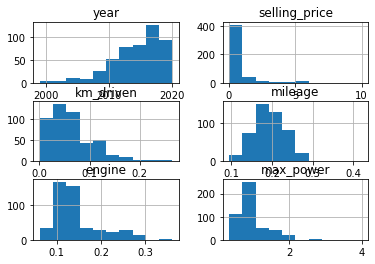

In [8]:
viz = cdf
viz.hist()
plt.show()

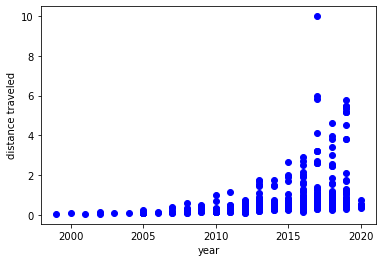

In [9]:
plt.scatter(cdf.year, cdf.selling_price, color = 'blue')
plt.xlabel("year")
plt.ylabel("distance traveled")
plt.show()

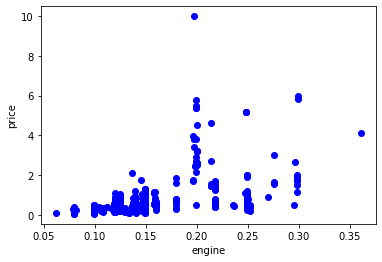

In [10]:
plt.scatter(cdf.engine, cdf.selling_price, color = 'blue')
plt.xlabel("engine")
plt.ylabel("price")
plt.show()

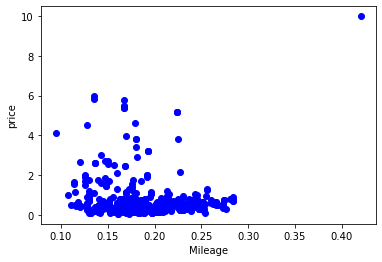

In [11]:
plt.scatter(cdf.mileage, cdf.selling_price, color = 'blue')
plt.xlabel("Mileage")
plt.ylabel("price")
plt.show()

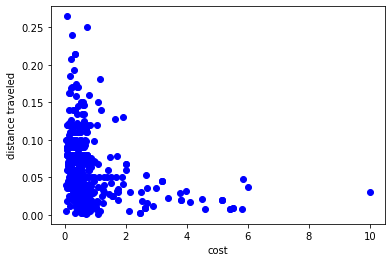

In [12]:
plt.scatter(cdf.selling_price, cdf.km_driven, color = 'blue')
plt.xlabel("cost")
plt.ylabel("distance traveled")
plt.show()

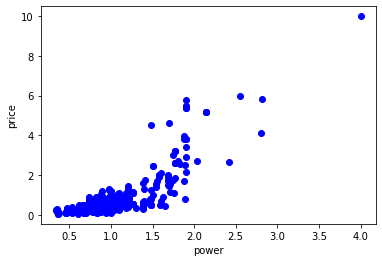

In [13]:
plt.scatter(cdf.max_power, cdf.selling_price, color = 'blue')
plt.xlabel('power')
plt.ylabel("price")
plt.show()

In [14]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
train_x = np.asanyarray(train['max_power'])
train_y = np.asanyarray(train['selling_price'])
#train_x = train_x_set/10000
#train_y = train_y_set/1000000
#print("x = {x}\ny = {y}".format(x = train_x, y = train_y))
#plt.scatter(train_x, train_y, color = 'blue')
#plt.xlabel("engine")
#plt.ylabel('cost')
#plt.show()

x = [0.74    0.78    0.9     0.8186  0.37    0.671   0.681   1.0845  0.6
 0.739   0.67    0.885   0.9     0.8873  0.986   0.74    0.888   0.8381
 0.473   0.738   0.67    0.342   0.885   0.35    0.671   0.67    0.37
 1.6077  1.173   1.163   0.8314  0.885   0.6705  1.685   1.      1.207
 0.9863  1.7556  0.986   1.0325  0.986   1.715   1.006   1.7433  1.3803
 1.8774  1.7     0.888   0.789   0.8876  0.831   1.08495 1.0862  0.885
 0.789   0.74    1.685   0.74    0.937   1.036   1.006   0.9859  1.89
 0.6704  0.6705  0.473   0.74    0.6805  1.036   0.671   0.8285  0.74
 0.82    0.463   0.8873  0.6705  0.9     0.73    0.831   1.2     1.6
 0.65    1.55    0.6901  1.2632  0.6704  0.885   0.8314  0.6704  1.262
 0.739   0.67    0.6704  0.8876  0.621   0.8876  0.867   1.88    2.1456
 2.8     1.8774  1.9     1.7746  2.04    1.41    1.176   1.3803  2.414
 0.885   2.82    1.5     1.475   1.77    1.036   1.475   1.035   1.83
 0.937   1.8104  1.163   0.818   0.818   1.577   1.9     1.647   0.911
 4.    

In [25]:
alpha = 0.01
theta_0 = 0.0
theta_1 = 0.0
m = len(train_x)
h_theta = np.zeros(len(train_y))
data = np.zeros((len(h_theta), 2))
for i in range(10000):
    h_theta = theta_0 + (theta_1 * train_x)
    data[i][0] = theta_0
    data[i][1] = theta_1
    temp_theta_0, temp_theta_1 = 0.0, 0.0
    j_theta, j_theta_1 = 0.0, 0.0
    #for j in range(len(train_y)):
    temp_theta_0 = theta_0 - (alpha * ((-2.0/m) * sum(train_y - h_theta)))
    temp_theta_1 = theta_1 - (alpha * (-2.0/m) * sum((train_y - h_theta) * train_x))
        #j_theta_1 = j_theta_1 + (h_theta - train_y[j])
    #j_theta = j_theta + ((train_y[j] - h_theta[j]) ** 2)
    #j_theta = j_theta/(2 * len(train_y))
    #data[i][2] = j_theta
    #print(j_theta)
    #temp_theta_0 = temp_theta_0/(len(train_y))
    #temp_theta_1 = temp_theta_1/(len(train_y))
    #temp_theta_0 = -2 * temp_theta_0/len(train_x)
    #temp_theta_1 = -2 * temp_theta_1/len(train_x)
    #print(temp_theta_0)
    #print(temp_theta_0, temp_theta_1)
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
    print("theta_0= {}, theta_1= {}".format(theta_0, theta_1))

theta_0= 0.01599813237333334, theta_1= 0.023506074175306653
theta_0= 0.031217050388538323, theta_1= 0.04616120420944169
theta_0= 0.0456889637186074, theta_1= 0.06800010395249284
theta_0= 0.059444759618588854, theta_1= 0.08905606287506862
theta_0= 0.07251405720286799, theta_1= 0.10936100452890227
theta_0= 0.0849252594947242, theta_1= 0.12894554260803673
theta_0= 0.09670560333959728, theta_1= 0.147839034709071
theta_0= 0.10788120726974355, theta_1= 0.16606963388490587
theta_0= 0.1184771174043635, theta_1= 0.18366433808255153
theta_0= 0.128517351465832, theta_1= 0.20064903755184235
theta_0= 0.13802494098935272, theta_1= 0.21704856030833916
theta_0= 0.14702197180018423, theta_1= 0.23288671573028244
theta_0= 0.15552962282954308, theta_1= 0.24818633636618065
theta_0= 0.16356820333736974, theta_1= 0.2629693180264755
theta_0= 0.17115718860734525, theta_1= 0.2772566582297115
theta_0= 0.17831525417686267, theta_1= 0.2910684930707465
theta_0= 0.18506030866208356, theta_1= 0.3044241325757676
theta

IndexError: index 375 is out of bounds for axis 0 with size 375

In [26]:
print(theta_0, theta_1)

-0.3791987501677771 1.2866715803309399


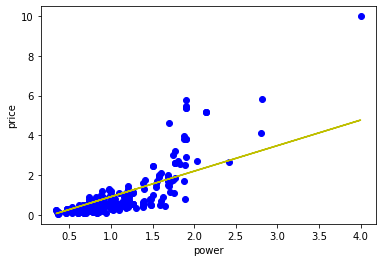

In [27]:
plt.scatter(train_x, train_y, color = 'blue')
plt.plot(train_x, theta_0 + theta_1 * train_x, '-y')
plt.xlabel('power')
plt.ylabel('price')
plt.show()

In [28]:
test_x = np.asanyarray(test['max_power'])
test_y = np.asanyarray(test['selling_price'])
#test_x = test_x_set/10000
#test_y = test_y_set/1000000

y_hat = np.zeros(len(test_y))
y_hat = theta_0 + theta_1 * test_x
se = sum((y_hat - test_y) ** 2)
mse = (1/2 * len(test_x)) * se
mse

2552.261067068878

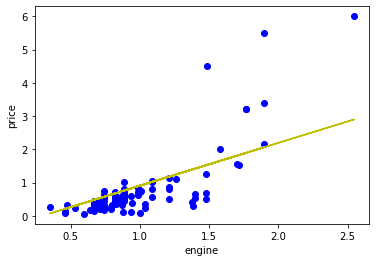

In [29]:
plt.scatter(test_x, test_y, color = 'blue')
plt.plot(test_x, theta_0 + theta_1 * test_x, '-y')
plt.xlabel('engine')
plt.ylabel('price')
plt.show()

In [30]:
test_y_mean = np.mean(test_y)
se_down = (sum((test_y - test_y_mean) ** 2))
rse = se/se_down
r2_score = 1 - rse
r2_score * 100

52.26066165090275